# Salary prediction EDA

In [197]:
# Info
__author__ = 'Manoj Kumar Reddy Buchupalli'
__email__ = 'manojece4288@gmail.com'

import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline
import seaborn as sns

# Load Data

In [148]:
train_features=pd.read_csv(r'C:\Users\manoj\Downloads\DSDJ Project\data\train_features.csv')
train_target=pd.read_csv(r'C:\Users\manoj\Downloads\DSDJ Project\data\train_salaries.csv')
test_features=pd.read_csv(r'C:\Users\manoj\Downloads\DSDJ Project\data\test_features.csv')

# Examine

In [149]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [150]:
train_target.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [151]:
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


# Check the length and dtypes

In [152]:
train_features.shape

(1000000, 8)

In [153]:
train_target.shape

(1000000, 2)

In [154]:
test_features.shape

(1000000, 8)

In [155]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [156]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [157]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


# Check for duplicates

In [158]:
train_features.duplicated().sum()

0

In [159]:
test_features.duplicated().sum()

0

In [160]:


train_target.duplicated().sum()

0

# Identify numerical and categorical variables

In [161]:
train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [162]:
num_cols=['yearsExperience', 'milesFromMetropolis']
cat_cols=['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

# Summarize numerical and categorical variables separately

In [163]:

train_features.describe(include=np.number)

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [164]:
train_features.describe(include='O')

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684895028,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


# Combine the  features and targets into single Dta frame

In [165]:
train_data=pd.merge(train_features,train_target,on='jobId')

In [166]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Visualize target variable

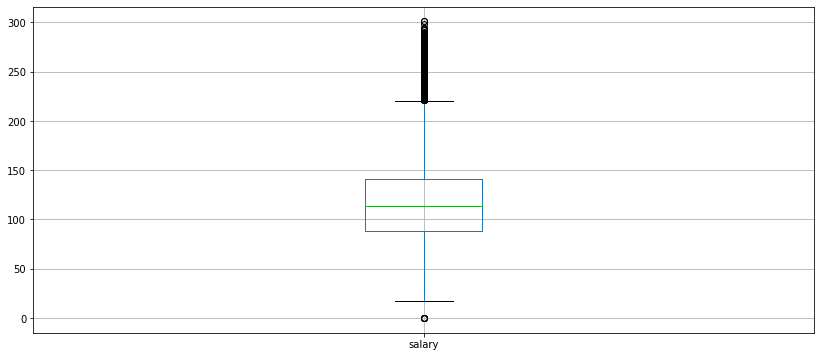

In [167]:
plt.figure(figsize=(14,6))
train_target.boxplot()

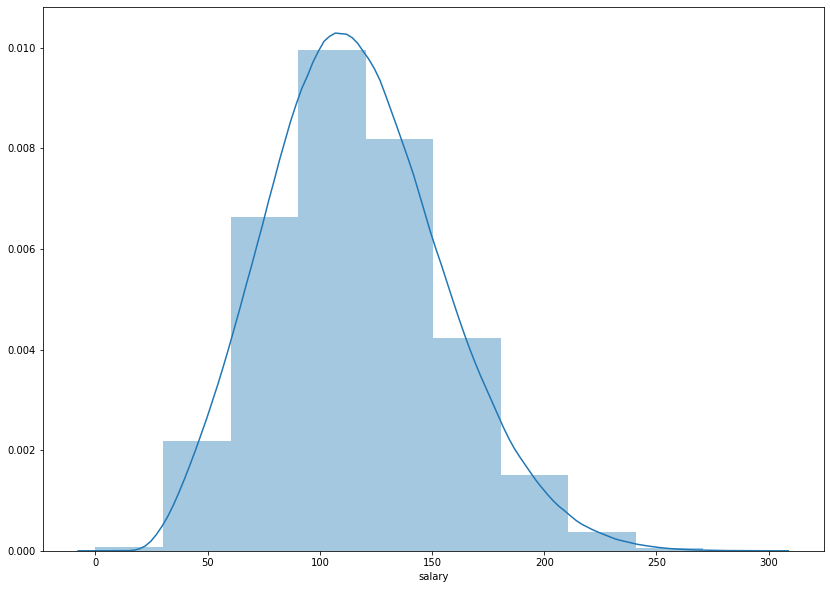

In [168]:
plt.figure(figsize=(14,10))
sns.distplot(train_data.salary,bins=10)

# Use IQR rule to identify potential outliers

In [169]:
train_data.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

In [170]:
Q1,Q3=np.percentile(train_data.salary,[25,75])

In [171]:
IQR=Q3-Q1

In [172]:
IQR

53.0

In [173]:
lower_ouliners=Q1-(IQR*1.5)
lower_ouliners

8.5

In [174]:
upper_outliners=Q3+(IQR*1.5)
upper_outliners

220.5

In [175]:
train_data[train_data.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


## Replacing the 0 values with the mean of the salary column is a good solution

In [176]:
train_data['salary']=train_data['salary'].replace(0,train_data['salary'].mean())

In [177]:
train_data.loc[train_data.salary>222.5,'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [178]:
train_data[(train_data.salary>222.5) & (train_data.jobType=='JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225.0
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246.0
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225.0
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248.0
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223.0
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226.0
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226.0
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227.0
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230.0
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225.0


Most of The high-salary outliers all appear to be legitimate.because, Most roles are C-level roles and the junior positions mostly with degree of MASTERS and DOCTORAL in industries are  known for high paid in oil, finance industries.
We can say that these entries to be legitimate and will not remove them.

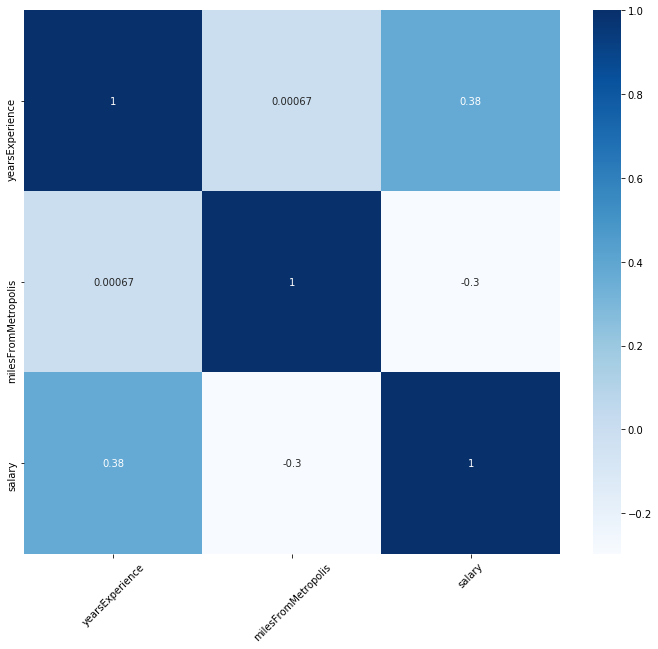

In [186]:
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_data[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

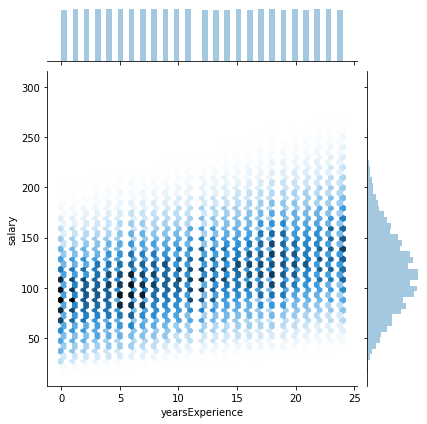

In [180]:
sns.jointplot(x='yearsExperience',y='salary', kind='hex',
             data=train_data)

## Above breifs that increase in years of experience results in an increased salary with positive coefficient of 0.38.

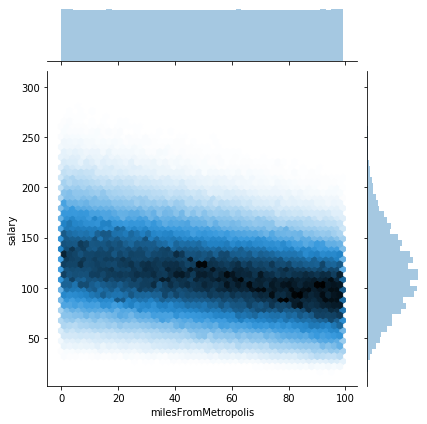

In [181]:
sns.jointplot(x='milesFromMetropolis',y='salary',kind='hex',data=train_data)


## Plot above briefs that an increase in the distance from the metropolis results in lesser salaries with negative coefficient.

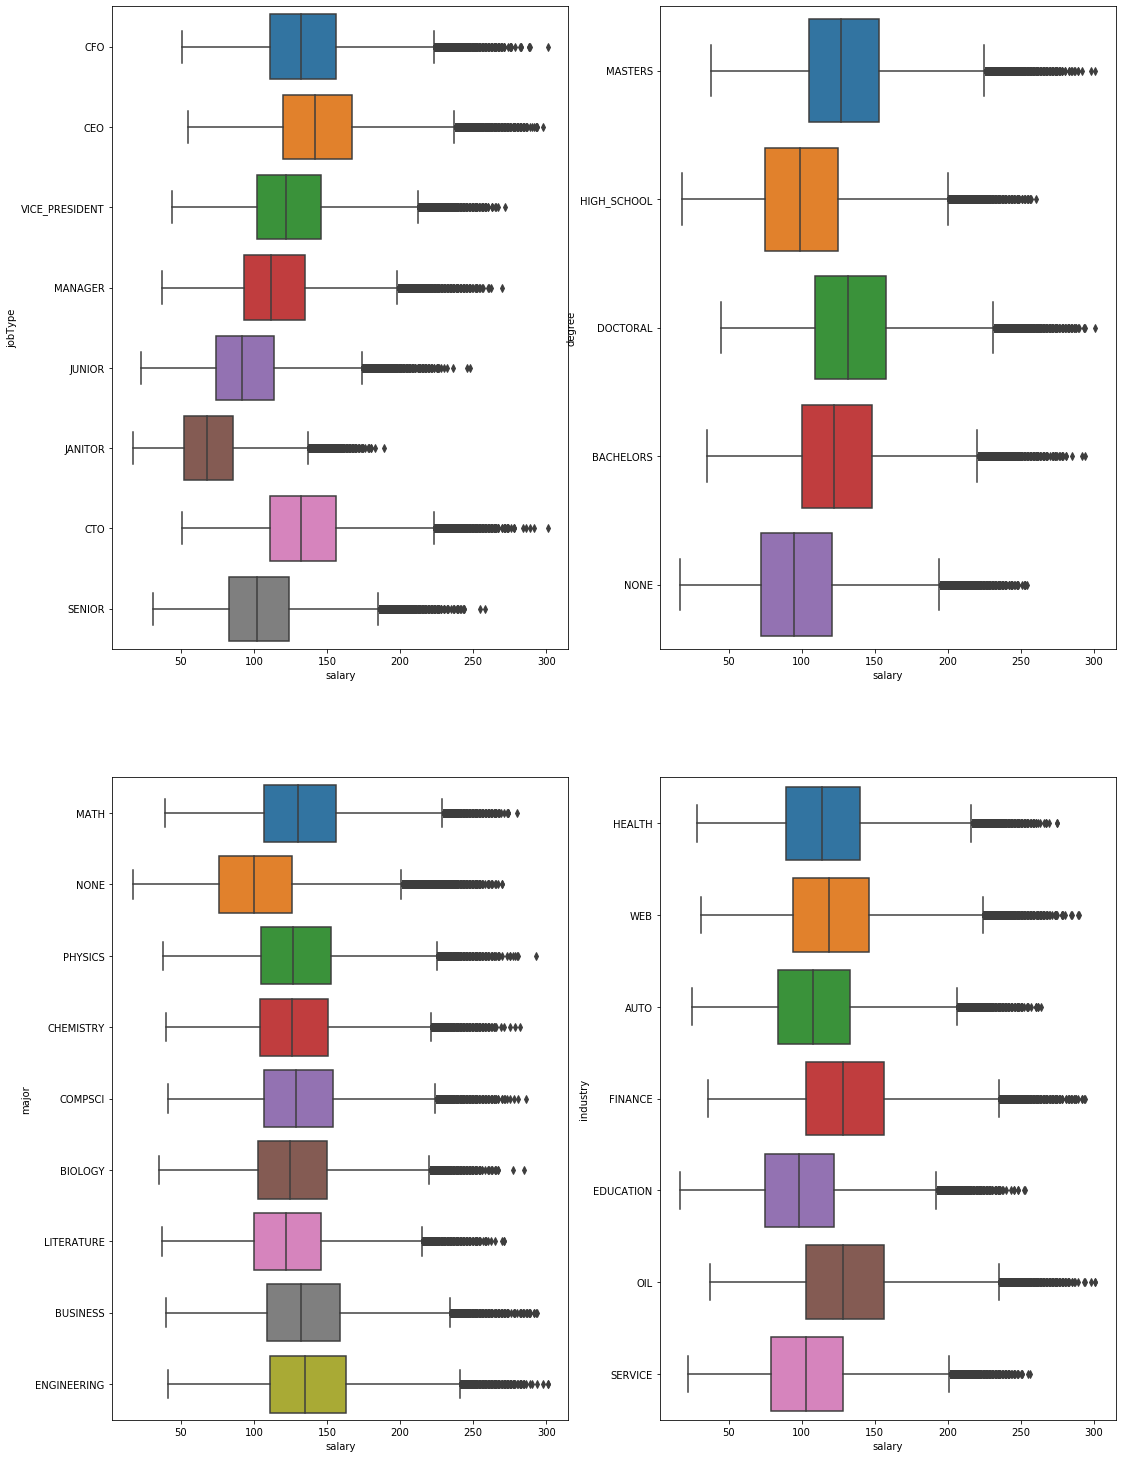

In [196]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(18,26))

ax=sns.boxplot(x='salary',y='jobType',data=train_data,ax=axes[0,0])
ax=sns.boxplot(x='salary',y='degree',data=train_data,ax=axes[0,1])
ax=sns.boxplot(x='salary',y='major',data=train_data,ax=axes[1,0])
ax=sns.boxplot(x='salary',y='industry',data=train_data,ax=axes[1,1])

In [206]:
colnames=['jobType', 'degree', 'major', 'industry']
for col in colnames:
    model=ols('salary ~ ' +col,data = train_data).fit()
    print('column : {} , F-Statistic : {} , p-value = {}'.format(col,model.fvalue,model.f_pvalue))

column : jobType , F-Statistic : 79301.5811927584 , p-value = 0.0
column : degree , F-Statistic : 47987.94198672973 , p-value = 0.0
column : major , F-Statistic : 20924.450963293268 , p-value = 0.0
column : industry , F-Statistic : 16079.114331749188 , p-value = 0.0
